# Step 1: Imports

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import pickle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import cv2
import keras
import sys
import numpy
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Here we convert images into pixel arrays and we label them

DIRECTORY = r'C:\Users\Javonne\Downloads\dogscats\train'
CATEGORIES = ['cats', 'dogs']

data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (60, 60))
        data.append([new_arr, label])

In [3]:
data[22000]

[array([[ 48,  88,  83, ...,  58,  59,  53],
        [ 52, 100, 116, ...,  54,  64,  66],
        [ 60, 110, 172, ...,  59,  52,  65],
        ...,
        [ 70,  60,  50, ...,  66,  63,  86],
        [ 73,  58,  48, ...,  49,  52,  48],
        [ 68,  49,  39, ...,  52,  76,  62]], dtype=uint8),
 1]

In [4]:

# Data represents our dataset filled with images of both cats on dogs. Data[a] will return the 
# specific pixel array for the image indexed at position a within the array as well as the label of 
# the. Whereas data[a][0] and data[a][1] will return the pixel array and the population member 
# respectively

#IIn the following 
# cell we use the random library to shuffle the data to mix the cats and dogs randomly. We do this 
# so our CNN gets used to identifying both cats and dogs while it trains and we will therfore avoid 
# initial overfitting to only recognise one of the two

random.shuffle(data)

In [5]:
# features(the pixel array) and label(the catdog id of the image) are set to two separate arrays,
# x and y.

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [6]:
X[1]


array([[105,  99,  99, ...,  44,  54,  50],
       [ 48,  46,  47, ...,  64,  47,  48],
       [ 46,  51,  47, ...,  58,  46,  50],
       ...,
       [180, 190, 181, ...,  51,  19,   6],
       [191, 181, 191, ...,  59,  32,  13],
       [194, 180, 191, ...,  56,  36,  21]], dtype=uint8)

In [7]:
# X represents the pixel array for an image in our dataset. The reshape works as follows:

# .reshape() will reshape our data in the format 60x60 rowsXcollumn

X = X.reshape(-1, 60, 60, 1)

We create the structure of the CNN

In [8]:
# We create the structure of the CNN

model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

We set the Optimise and loss functions as well as declare accuracy as a metric that we wish to track

In [9]:
# We set the Optimise and loss functions as well as declare accuracy as a metric that we wish to track

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We now fit the model. Here is where the model actually "learns". We tune the weights and biases to maximize or minimize a function (In our case maximize accuracy via the adam function)

In [10]:
# We now fit the model. Here is where the model actually "learns". We tune the weights and biases to
# maximize or minimize a function (In our case maximize accuracy via the adam function)

# this qas used to quickly fit the model when I was tuning my loss/optimisation function to obtain 
# quick results. After deciding which to use, I fit properly using a validation split of .3 and 10 
# epochs 
# model.fit(X, y, epochs=2, validation_split=0.9)

model.fit(X, y, epochs=10, validation_split=0.3)

Train on 16099 samples, validate on 6900 samples
Epoch 1/10
16099/16099 [==============================] - 70s 4ms/step - loss: 1.0323 - accuracy: 0.5456 - val_loss: 0.6840 - val_accuracy: 0.5410
Epoch 2/10
16099/16099 [==============================] - 69s 4ms/step - loss: 0.6755 - accuracy: 0.5710 - val_loss: 0.6888 - val_accuracy: 0.5357
Epoch 3/10
16099/16099 [==============================] - 67s 4ms/step - loss: 0.6625 - accuracy: 0.5833 - val_loss: 0.7012 - val_accuracy: 0.5428
Epoch 4/10
16099/16099 [==============================] - 69s 4ms/step - loss: 0.6487 - accuracy: 0.6028 - val_loss: 0.7630 - val_accuracy: 0.5600
Epoch 5/10
16099/16099 [==============================] - 67s 4ms/step - loss: 0.6145 - accuracy: 0.6387 - val_loss: 0.7134 - val_accuracy: 0.6051
Epoch 6/10
16099/16099 [==============================] - 66s 4ms/step - loss: 0.5707 - accuracy: 0.6825 - val_loss: 0.7247 - val_accuracy: 0.6033
Epoch 7/10
16099/16099 [==============================] - 66s 4ms/ste

We output a high level description of the CNN

In [11]:
# We output a high level description of the CNN

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 58, 58, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                

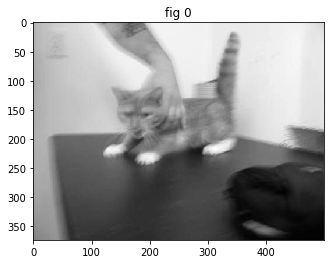

In [12]:
for categore in CATEGORIES:  # do dogs and cats
    path = os.path.join(DIRECTORY,categore)  # create path to dogs and cats
    
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.title("fig 0")
        plt.show()  # display!
        break  # we just want one for now so break
       
    break  #...and one more!

In [13]:
rs_img_array = cv2.resize(img_array, (100, 100))

The following cells will demonstrate how we predict the output of values using our newly trained CNN

In [14]:
prediction = model.predict(X[0:1])
print("Here is an array showing the prediction: {} ".format(prediction))
print("Below, each index is explained")

Here is an array showing the prediction: [[0.9754195  0.02458041]] 
Below, each index is explained


In [15]:
print("Chance of cat: {}".format(prediction[0][0])) 
print("chance of dog: {}".format(prediction[0][1])) 

Chance of cat: 0.9754195213317871
chance of dog: 0.02458040602505207


In [16]:
# DIRECTORYTEST = r'C:\Users\Javonne\Dropbox\zzboosdt\code projects\SummerMLProject\chosenImage'
DIRECTORYTEST = r'C:\Users\Javonne\JUPYTER\CatVDogKaggle\ToBeClassified'

CATEGORIES = ['cats', 'dogs']

dataTEST = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORYTEST, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (60, 60))
        dataTEST.append([new_arr, label])

In [17]:
XTEST = []
yTEST = []

for features, label in dataTEST:
    XTEST.append(features)
    yTEST.append(label)

XTEST = np.array(XTEST)
yTEST = np.array(yTEST)

In [18]:
XTEST = XTEST.reshape(-1, 60, 60, 1)
# predictionTEST = model.predict(XTEST[0:])
predictionTEST = model.predict(XTEST)


In [19]:
# functions to predict the classification and its certainty 

def certainty(figNumber):
    predictionTEST[figNumber].sort
    return max(predictionTEST[figNumber])    

def predictions():
    for i in range(0, len(predictionTESTguess)):
        if predictionTESTguess[i] == 0:
            print("fig {} is a cat, certainty of {:.6} out of 1".format(i+1, certainty(i)))
        if predictionTESTguess[i] == 1:
            print("fig {} is a dog, certainty of {:.6} out of 1".format(i+1, certainty(i)))    

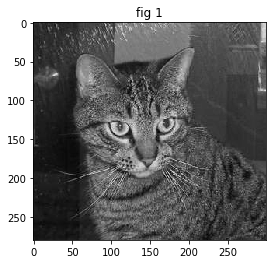

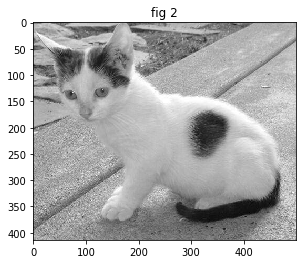

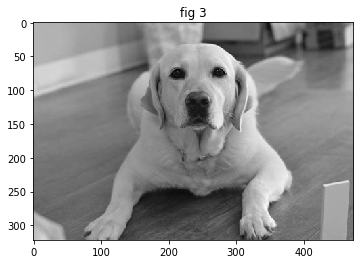

In [20]:
i=0
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DIRECTORYTEST,category)  # create path to dogs and cats
    
    
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        i+=1
        plt.title("fig {}".format(i))
        plt.show()  # display!
#         break  # we just want one for now so break
       


In [21]:
predictionTESTguess = predictionTEST.argmax(1)
predictionTESTguess

predictions()

fig 1 is a cat, certainty of 0.978162 out of 1
fig 2 is a cat, certainty of 0.792095 out of 1
fig 3 is a dog, certainty of 0.884459 out of 1
